In [1]:
def read(fname):
    with open(fname, 'r') as f:
        return f.read()
    return ''

# Read CSV data from file.
CSV = read('./all.csv').replace(' ', '')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
from io import StringIO

# Create DataFrame from CSV data.
df = pd.read_csv(StringIO(CSV))

# Cleanup.
df.drop(columns=['run'], inplace=True)  # Drop 'run' column.
df.drop_duplicates(inplace=True)        # Drop duplicates.

# Calculate new columns.
df['time_diff'] = df.outer_time - df.inner_time
df['time_per_call_ms'] = 1000 * df.inner_time / (df.depth * df.iterations)
df['call_rate'] = 1000 / df.time_per_call_ms

# Remove outliers.
#df = df[df.inner_time<=10.0]
#df = df[df.iterations<=500]
# df = df[df.time_diff<15]
# df = df[df.time_diff>0]

df.head()

,method,depth,iterations,inner_time,outer_time,time_diff,time_per_call_ms,call_rate
0,compute_time,20,1000,49.860,53.914895,4.054895,2.493000,401.123145
1,compute_time,20,500,24.316,29.080999,4.764999,2.431600,411.251851
2,compute_time,20,100,4.791,8.636473,3.845473,2.395500,417.449384
3,compute_time,15,1000,35.764,40.411320,4.647320,2.384267,419.416173
4,compute_time,15,500,17.302,21.176183,3.874183,2.306933,433.475899


In [3]:
df.time_per_call_ms.describe()

count    1976.000000
mean             inf
std              NaN
min         0.000000
25%         1.881425
50%         2.109297
75%         2.398294
max              inf
Name: time_per_call_ms, dtype: float64

In [4]:
df.time_diff.describe()

count    2023.000000
mean        7.321416
std        13.807756
min        -1.792458
25%         4.346156
50%         5.284450
75%         7.128903
max       387.516693
Name: time_diff, dtype: float64

In [5]:
_df = df
_df = _df[_df.time_diff <= 0]

_df

,method,depth,iterations,inner_time,outer_time,time_diff,time_per_call_ms,call_rate
130,compute_iterations,0,0,5.0,3.219142,-1.780858,inf,0.0
154,compute_iterations,0,0,4.0,3.902616,-0.097384,inf,0.0
177,compute_iterations,0,0,5.0,4.149434,-0.850566,inf,0.0
415,compute_iterations,0,0,5.0,3.207542,-1.792458,inf,0.0
416,compute_iterations,0,0,4.0,3.155921,-0.844079,inf,0.0
624,compute_iterations,0,0,5.0,4.520563,-0.479437,inf,0.0
729,compute_iterations,0,0,5.0,4.109879,-0.890121,inf,0.0


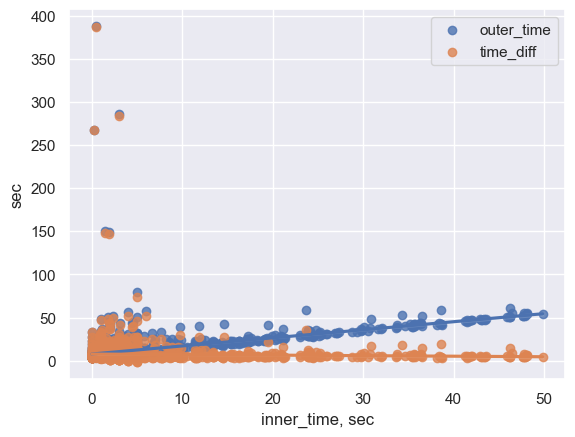

In [6]:
for label in ['outer_time', 'time_diff']:
    ax = sns.regplot(x='inner_time', y=label, data=df, label=label)
    ax.legend()
    ax.set(xlabel='inner_time, sec', ylabel='sec')


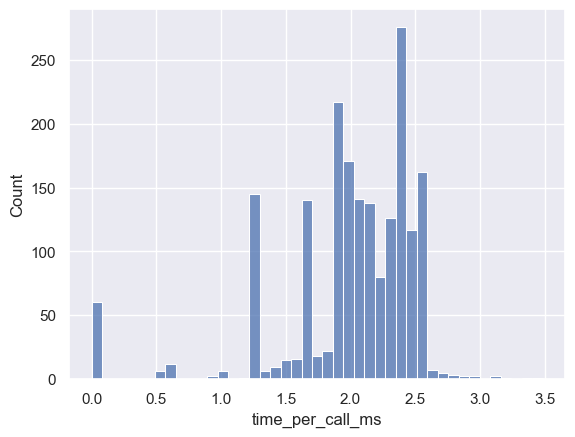

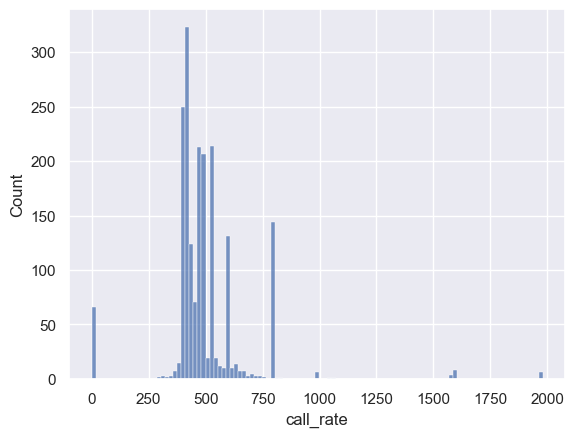

,method,depth,iterations,inner_time,outer_time,time_diff,time_per_call_ms,call_rate
0,compute_time,20,1000,49.860,53.914895,4.054895,2.493000,401.123145
1,compute_time,20,500,24.316,29.080999,4.764999,2.431600,411.251851
2,compute_time,20,100,4.791,8.636473,3.845473,2.395500,417.449384
3,compute_time,15,1000,35.764,40.411320,4.647320,2.384267,419.416173
4,compute_time,15,500,17.302,21.176183,3.874183,2.306933,433.475899
...,...,...,...,...,...,...,...,...
2018,compute_iterations,20,79,3.750,10.511518,6.761518,2.373418,421.333333
2019,compute_iterations,20,99,4.000,7.333826,3.333826,2.020202,495.000000
2020,compute_iterations,20,99,4.250,9.586498,5.336498,2.146465,465.882353
2021,compute_iterations,20,119,4.500,10.144555,5.644555,1.890756,528.888889


In [7]:
_df = df
_df = _df[_df.time_per_call_ms!=np.inf]

# fig, axs = plt.subplots(1,2)
# sns.histplot(x='time_per_call_ms', data=df).plot(ax=axs[0])
# sns.histplot(x='call_rate', data=df).plot(ax=axs[1])

plt.show(sns.histplot(x='time_per_call_ms', data=df))
plt.show(sns.histplot(x='call_rate', data=df))

# sns.regplot(x='iterations', y='time_per_call_ms', data=df)
# sns.regplot(x='inner_time', y='time_per_call_ms', data=df)
#sns.regplot(x='depth', y='time_per_call_ms', data=df)


_df

<AxesSubplot: xlabel='time_diff', ylabel='Count'>

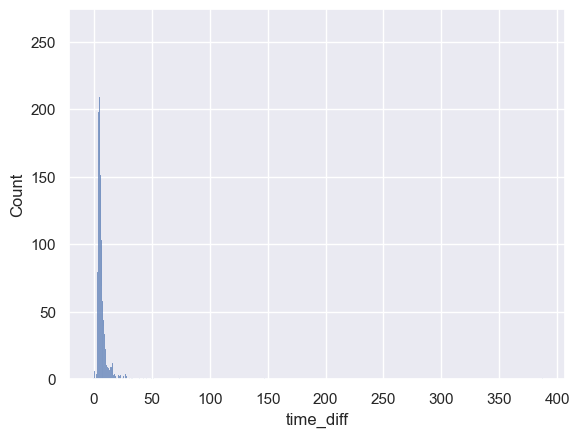

In [8]:
sns.histplot(x='time_diff', data=df)

In [9]:
# Calculate overhead for given time and depth.
INNER_TIME = 10.0
DEPTH = 9

_df = df
_df = _df[(_df.inner_time==INNER_TIME)&(_df.depth==DEPTH)]
_df = _df.groupby(by=['method']).median().reset_index()

# Calculate time per call.
_df['time per call, ms'] = 1000 * _df.inner_time / (_df.iterations * _df.depth)
_df = _df.round(3)

# Calculate overhead.
# a = _df[_df.method=='compute_ab'].inner_time.values[0]
# b = _df[_df.method=='compute_inner'].inner_time.values[0]
# overhead = round(a / b, 2)
# print(f'Inter-Canister Call Overhead: {a} / {b} = {overhead}')

_df

,method,depth,iterations,inner_time,outer_time,time_diff,time_per_call_ms,call_rate,"time per call, ms"


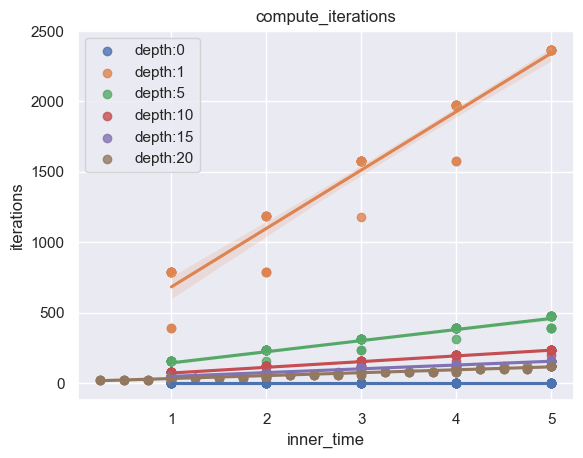

In [10]:
def plot_compute_iterations(df, depths=[0, 1, 5, 10, 15, 20]):
  method = 'compute_iterations'
  _df = df[df.method==method]
  for depth in depths:
    ax = sns.regplot(x="inner_time", y="iterations", data=_df[_df.depth==depth], label=f'depth:{depth}')
    ax.legend()
  ax.set(title=method)

plot_compute_iterations(df)

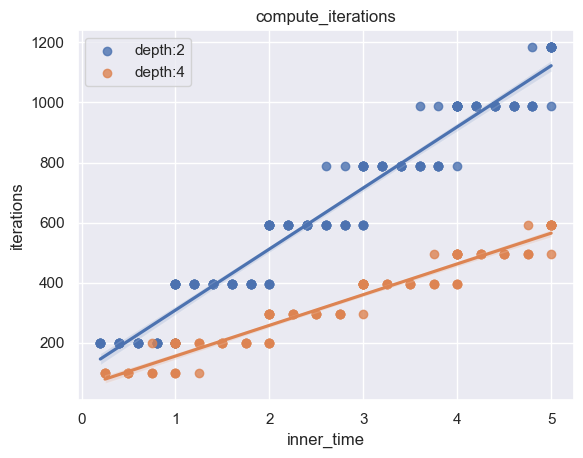

In [11]:
plot_compute_iterations(df, [2, 4])

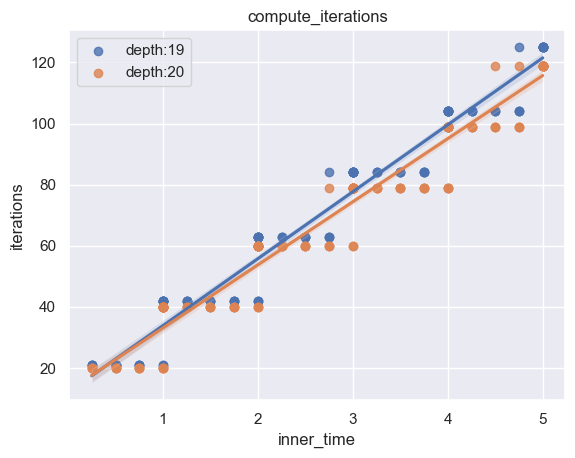

In [12]:
plot_compute_iterations(df, [19, 20])

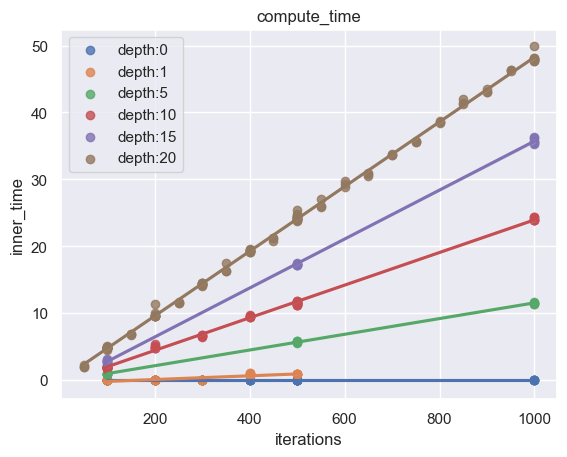

In [13]:
def plot_compute_time(df, depths=[0, 1, 5, 10, 15, 20]):
  method = 'compute_time'
  _df = df[df.method==method]
  for depth in depths:
    ax = sns.regplot(x="iterations", y="inner_time", data=_df[_df.depth==depth], label=f'depth:{depth}')
    ax.legend()
  ax.set(title=method)

plot_compute_time(df)

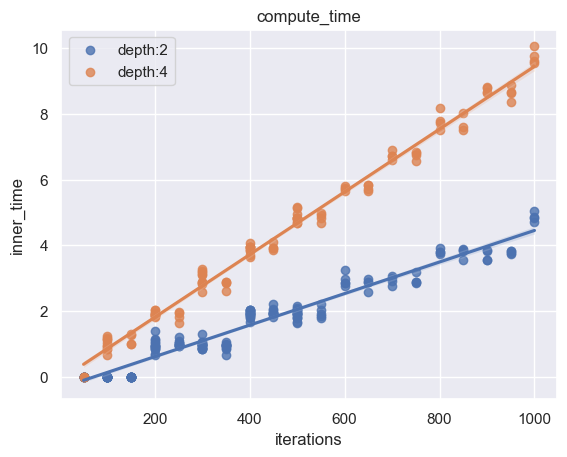

In [14]:
plot_compute_time(df, [2, 4])

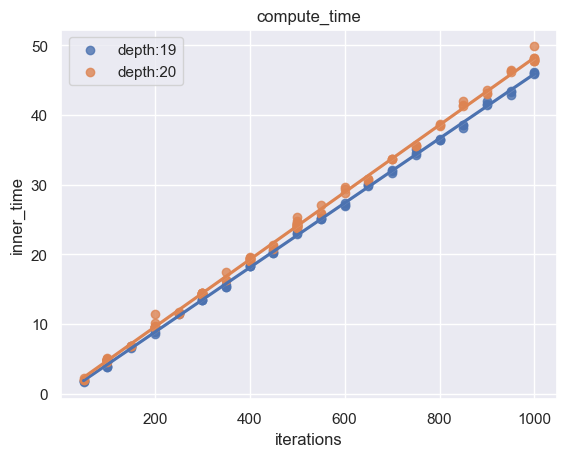

In [15]:
plot_compute_time(df, [19, 20])

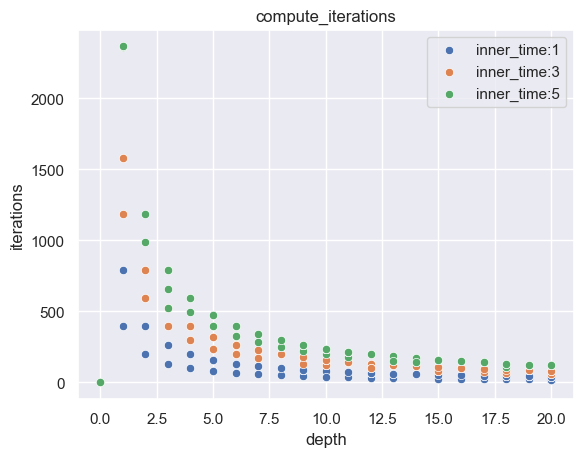

In [16]:
def plot_depth(df):
  method = 'compute_iterations'
  _df = df[df.method==method]
  for inner_time in [1, 3, 5]:
    ax = sns.scatterplot(x="depth", y="iterations", data=_df[_df.inner_time==inner_time], label=f'inner_time:{inner_time}')
    ax.legend()
  ax.set(title=method)

plot_depth(df)